In [51]:
i=["Apple","bacon","banana","carrot","celery","cheeze","mango","tomato","beans","choclate"]
s=[10,1,10,7,3,1,9,6,3,15]
c=[9,4,1,10,10,1,5,4,5,1]
f=["fruit","protein","fruit","vegitable","vegitable","protein","fruit","fruit","vegitable","protein"]

In [52]:
import pandas as pd

In [53]:
df=pd.DataFrame({"Ingredient":i,"Sweetness":s,"Crunchiness":c,"food_type":f})

In [54]:
import pandas as pd
import numpy as np
df.to_csv("food.csv",index=False,encoding='utf-8')

In [55]:
print(df)

  Ingredient  Sweetness  Crunchiness  food_type
0      Apple         10            9      fruit
1      bacon          1            4    protein
2     banana         10            1      fruit
3     carrot          7           10  vegitable
4     celery          3           10  vegitable
5     cheeze          1            1    protein
6      mango          9            5      fruit
7     tomato          6            4      fruit
8      beans          3            5  vegitable
9   choclate         15            1    protein


In [56]:
df=pd.read_csv("food.csv")

In [57]:
print(df)

  Ingredient  Sweetness  Crunchiness  food_type
0      Apple         10            9      fruit
1      bacon          1            4    protein
2     banana         10            1      fruit
3     carrot          7           10  vegitable
4     celery          3           10  vegitable
5     cheeze          1            1    protein
6      mango          9            5      fruit
7     tomato          6            4      fruit
8      beans          3            5  vegitable
9   choclate         15            1    protein


In [58]:
df.shape

(10, 4)

In [59]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [60]:
df.head()

,Ingredient,Sweetness,Crunchiness,food_type
0,Apple,10,9,fruit
1,bacon,1,4,protein
2,banana,10,1,fruit
3,carrot,7,10,vegitable
4,celery,3,10,vegitable


In [61]:
df.value_counts("food_type")

food_type
fruit        4
protein      3
vegitable    3
dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder

l= LabelEncoder()
df['Ingredient']= l.fit_transform(df['Ingredient'])
df['food_type']= l.fit_transform(df['food_type'])
print(df)

   Ingredient  Sweetness  Crunchiness  food_type
0           0         10            9          0
1           1          1            4          1
2           2         10            1          0
3           4          7           10          2
4           5          3           10          2
5           6          1            1          1
6           8          9            5          0
7           9          6            4          0
8           3          3            5          2
9           7         15            1          1


In [63]:
y=df["food_type"]
df.drop("food_type",axis=1,inplace=True)
x=df
print(y)
print(x)

0    0
1    1
2    0
3    2
4    2
5    1
6    0
7    0
8    2
9    1
Name: food_type, dtype: int32
   Ingredient  Sweetness  Crunchiness
0           0         10            9
1           1          1            4
2           2         10            1
3           4          7           10
4           5          3           10
5           6          1            1
6           8          9            5
7           9          6            4
8           3          3            5
9           7         15            1


In [64]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)


In [65]:
#Feature Scaling(MinMaxScaler)

from sklearn.preprocessing import MinMaxScaler    
st_x= MinMaxScaler()    
x_train= st_x.fit_transform(x_train) 
x_test=st_x.fit_transform(x_test)
print(x_train)



[[0.77777778 1.         0.        ]
 [0.11111111 0.         0.33333333]
 [0.88888889 0.57142857 0.44444444]
 [1.         0.35714286 0.33333333]
 [0.44444444 0.42857143 1.        ]
 [0.         0.64285714 0.88888889]
 [0.66666667 0.         0.        ]]


In [66]:
# Fitting k-NN classifier to the training set

from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [67]:
# Predicting the Test Result:

y_pred= classifier.predict(x_test)  
print(y_pred)


[0 1 0]


In [68]:
#Creating the Confusion Matrix to see the accuracy of the classifier

from sklearn.metrics import confusion_matrix
cm= confusion_matrix (y_test, y_pred,labels=classifier.classes_)  
print(cm)


[[1 0 0]
 [0 0 0]
 [1 1 0]]


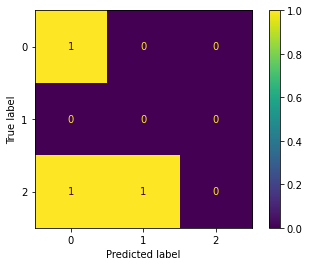

In [69]:
##Confusion Matrix Display

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()


In [70]:
##Classifier Accuracy

training_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print(training_score)
print(test_score)


0.5714285714285714
0.3333333333333333


In [71]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 8):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
  
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]


In [72]:
##Evaluating the model

for keys, values in scores.items():
    print(keys, ':', values)


2 : [0.5714285714285714, 0.3333333333333333]
3 : [0.7142857142857143, 0.0]
4 : [0.5714285714285714, 0.3333333333333333]
5 : [0.5714285714285714, 0.0]
6 : [0.2857142857142857, 0.0]
7 : [0.42857142857142855, 0.3333333333333333]


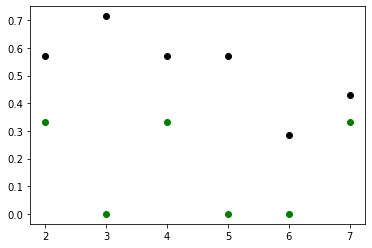

In [73]:
###Visualization

import matplotlib.pyplot as plt
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
